
# <div style="text-align: right"> Logistic Regression from Scratch. </div>

---

<div style="text-align: right"> Geoff Counihan - Oct 30, 2017 </div>

### Notes

---

Inspired by [Machine learning mastery](https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/)
    
__Additions__: L1 and L2 norm

In [1]:
from sklearn.datasets import load_iris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
Xy = pd.read_csv('./sonar.all-data.csv',header=None)
Xy[60] = Xy[60].map({'R':0,'M':1})
X = np.array(Xy.iloc[:,:-1])
y = np.array(Xy.iloc[:,-1])
Xy = np.array(Xy)

### Link Function

GLMs or Generalized Linear Models convert a linear regression into a classification by using a link function.

---

__Sigmoid__ - a function whose values at -inf are 0 and +inf are 1

In [4]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

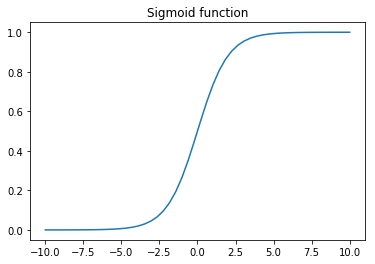

In [5]:
a = np.linspace(-10,10)

plt.plot(a,sigmoid(a))
plt.title('Sigmoid function')

__Gradient Descent__ - a simple iterative optimization algorithm that operates over a loss landscape

In [6]:
lr = .01
w = np.random.uniform(size=(X.shape[1],))
steps = 100

def gradient_descent(X,y,w,lr,steps):
    Xt = X.transpose()
    for i in range(steps):
        h = np.dot(X, w)
        loss = h - y
        cost = np.sum(loss ** 2) / (2 * X.shape[0])
        print('iter: {} | cost: {}'.format(i,cost))
        gradient = np.dot(Xt, loss) / X.shape[0]
        w -= lr * gradient
    return w

In [8]:
lr = .01
w = np.random.uniform(size=(X.shape[1],))
steps = 100
gradient_descent(X,y,w,lr,steps)

iter: 0 | cost: 27.827575511628332
iter: 1 | cost: 23.64389020614845
iter: 2 | cost: 20.097546457908045
iter: 3 | cost: 17.091412164611196
iter: 4 | cost: 14.543158618264819
iter: 5 | cost: 12.383004395547406
iter: 6 | cost: 10.551803090324627
iter: 7 | cost: 8.999422485086102
iter: 8 | cost: 7.683370744585783
iter: 9 | cost: 6.567631984293257
iter: 10 | cost: 5.6216793039102635
iter: 11 | cost: 4.819638239408154
iter: 12 | cost: 4.1395777090676225
iter: 13 | cost: 3.562909022810906
iter: 14 | cost: 3.073876485451896
iter: 15 | cost: 2.6591256345028973
iter: 16 | cost: 2.307337280651693
iter: 17 | cost: 2.0089173222599856
iter: 18 | cost: 1.7557338336494444
iter: 19 | cost: 1.5408942224187974
iter: 20 | cost: 1.358556349075583
iter: 21 | cost: 1.2037684329596117
iter: 22 | cost: 1.0723333572864386
iter: 23 | cost: 0.9606936547655595
iter: 24 | cost: 0.8658340219725564
iter: 25 | cost: 0.78519869100732
iter: 26 | cost: 0.7166213941152558
iter: 27 | cost: 0.6582660020422959
iter: 28 | co

array([ 0.95732832,  0.53794631,  0.79766695,  0.59141848,  0.76220985,
        0.3295569 ,  0.4818405 , -0.0981956 ,  0.75359045,  0.61710395,
        0.22174394,  0.64708165,  0.58600279,  0.13861325,  0.48205109,
        0.18798851, -0.03992163, -0.18917126,  0.29615915, -0.0477232 ,
       -0.40168692, -0.18457437, -0.43699258,  0.17822991,  0.29050352,
       -0.30045744, -0.35453455, -0.27930141, -0.01271641, -0.1592708 ,
       -0.17446708,  0.03827499, -0.38718635,  0.53391693, -0.38874342,
        0.01073837,  0.4077501 ,  0.32599282, -0.14831391, -0.11417533,
        0.32907302, -0.1712312 ,  0.422403  , -0.219125  ,  0.14701967,
        0.7960979 ,  0.86440931,  0.17231968, -0.00327667,  0.4931483 ,
        0.40762318,  0.75540913,  0.76820578,  0.17142987,  0.90611683,
        0.34880761,  0.35520962,  0.82585832,  0.32863412,  0.49544675])

In [55]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

In [81]:
x = np.linspace(0,10)
v = lambda x: x*.5 + 2
y = v(x) + (np.random.rand(50)*1)

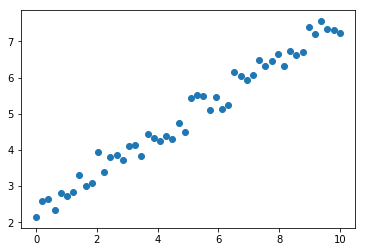

In [63]:
plt.scatter(x,y)

In [82]:
points = pd.DataFrame(x,y).reset_index().values

In [65]:
points = list(zip(x,y))

In [83]:
points = np.array([[2,3],[3,4]])
i=0
x = points[i, 0]
y = points[i, 1]

In [95]:
compute_error_for_line_given_points(2,.5,points)

0.125

In [97]:
compute_error_for_line_given_points(1,.5,points)

1.625

In [98]:
compute_error_for_line_given_points(4,0,points)

0.5

In [135]:
np.linspace(1,3,50).shape

(50,)

In [153]:
space = pd.DataFrame()
bi = {}

ms = np.linspace(-100,100,100)
bs = np.linspace(-100,100,100)

bi = []
for m in ms:
    mi = []
    #mi[m] = []
    for b in bs:
        mi.append(compute_error_for_line_given_points(m,b,points))
        #mi[m].append(compute_error_for_line_given_points(m,b,points))
    bi.append(mi)

In [154]:
space = pd.DataFrame(bi)
space.columns = bs
space.index = ms

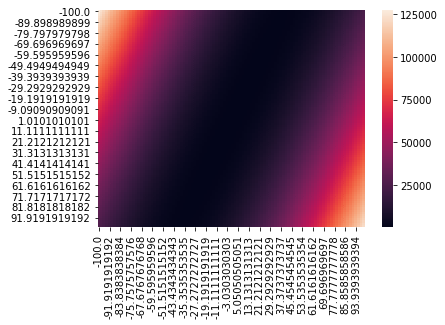

In [155]:
import seaborn as sns
sns.heatmap(space)

In [91]:
print('{} optimally lowest error'.format(compute_error_for_line_given_points(b=2,m=.5,points)))
#compute_error_for_line_given_points(.5,2,points)

SyntaxError: positional argument follows keyword argument (<ipython-input-91-5a62734f0edf>, line 1)

__Predict__ - 

In [9]:
idx = 3
print('prediction: {}, actual: {}'.format(X[idx].dot(w),y[idx]))

prediction: 0.7497222985208888, actual: 0


In [10]:
def predict_proba(sample):
    return sigmoid(sample.dot(w))

In [11]:
def predict(X_test,thresh=0.5):
    for i in X_test:
        if i.dot(w) < thresh:
            return 0
        else:
            return 1

In [12]:
predict(X[:2,])

1

__Stocastic Gradient Descent__ - 

### Create class.

---

__Tie__ - Added to modify behavior when there is a tie for majority class

In [249]:
class logistic_regression(object):
    def __init__(self, lr=0.01, steps=10000, thresh=0.5):
        self.lr = lr
        self.steps = steps
        self.thresh = thresh
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def gradient_descent(self):
        Xt = self.X.transpose()
        for i in range(self.steps):
            #print(i)
            h = np.dot(self.X, self.w)
            loss = h - y
            cost = np.sum(loss ** 2) / (2 * self.X.shape[0])
            #print('iter: {} | cost: {}'.format(i,cost))
            gradient = np.dot(Xt, loss) / self.X.shape[0]
            self.w = self.w - self.lr * gradient
    
    def fit(self,X,y):
        '''Save training data.
        
        '''
        self.X = X
        self.y = y
        self.Xy = np.column_stack((X, y))
        self.w = np.random.uniform(size=(X.shape[1],))
        
        self.gradient_descent()
    
    def predict_proba(self, X_test):
        self.y_pred_proba = self.sigmoid(X_test.dot(self.w))
        return self.y_pred_proba
    
    def predict(self, X_test):
        self.y_pred = np.array([])
        for i in range(X_test.shape[0]):
            if self.predict_proba(np.dot(X_test[i],self.w)) < self.thresh:
                self.y_pred = np.append(0)
            else:
                self.y_pred = np.append(1)
        return self.y_pred
        

#### Test

In [250]:
from sklearn.model_selection import train_test_split

Xy = pd.read_csv('./sonar.all-data.csv',header=None)
Xy[60] = Xy[60].map({'R':0,'M':1})
X = np.array(Xy.iloc[:,:-1])
y = np.array(Xy.iloc[:,-1])
Xy = np.array(Xy)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)

In [251]:
lr = logistic_regression()

In [252]:
lr.fit(X,y)

In [253]:
lr.predict(X_test)

AttributeError: 'numpy.float64' object has no attribute 'dot'

In [32]:
%%time
my_pred = dt.predict(X_test)

CPU times: user 964 µs, sys: 933 µs, total: 1.9 ms
Wall time: 1.25 ms


### Display tree.
---

In [33]:
dt.display_tree()

[feat1 < 5.40]
	[feat2 < 2.70]
		[1.0]
		[0.0]
	[feat1 < 6.20]
		[1.0]
		[2.0]


### Compare performance

---

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [35]:
clf = DecisionTreeClassifier(max_depth=2,min_samples_split=30)

In [36]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=30, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [37]:
sk_pred = clf.predict(X_test)

### Sample points

---

In [38]:
a = X_test[:3]

In [39]:
print('sk_pred: {}'.format(clf.predict(a)))
print('my_pred: {}'.format(dt.predict(a)))
print('true: {}'.format(y_test[:3]))

sk_pred: [1 1 2]
my_pred: [ 1.  1.  2.]
true: [1 1 2]


### Accuracy differences

---

I'm unclear how sklearn differs. Will need to look deeper

In [40]:
def accuracy(pred,true):
    correct = 0
    pred_len = len(pred)
    for i in range(pred_len):
        if pred[i] == true[i]:
            correct += 1
    return correct/pred_len

In [41]:
accuracy(my_pred,y_test)

0.7631578947368421

In [42]:
accuracy(sk_pred,y_test)

0.7894736842105263

In [43]:
list(zip(my_pred,sk_pred,y_test))

[(1.0, 1, 1),
 (1.0, 1, 1),
 (2.0, 2, 2),
 (2.0, 2, 1),
 (0.0, 0, 0),
 (2.0, 2, 2),
 (2.0, 2, 2),
 (1.0, 1, 1),
 (1.0, 1, 1),
 (0.0, 0, 0),
 (1.0, 0, 1),
 (2.0, 2, 2),
 (0.0, 0, 0),
 (2.0, 2, 2),
 (0.0, 0, 0),
 (1.0, 1, 2),
 (1.0, 1, 1),
 (0.0, 0, 0),
 (0.0, 0, 0),
 (0.0, 0, 0),
 (2.0, 2, 1),
 (1.0, 1, 1),
 (2.0, 2, 2),
 (2.0, 2, 1),
 (0.0, 0, 0),
 (1.0, 0, 0),
 (1.0, 0, 0),
 (2.0, 2, 2),
 (0.0, 0, 0),
 (2.0, 2, 2),
 (0.0, 0, 0),
 (1.0, 1, 1),
 (1.0, 1, 2),
 (0.0, 0, 0),
 (2.0, 2, 1),
 (1.0, 1, 2),
 (0.0, 0, 0),
 (2.0, 2, 2)]